In [1]:
import os
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import mpl_stylesheet
import re
import gc
mpl_stylesheet.banskt_presentation(fontfamily = 'mono', fontsize = 20, colors = 'banskt', dpi = 300)

In [2]:
# Load the data
import json

disprot_file = "AF2_testset.json"
with open(disprot_file) as infmt:
    disprot_dict = json.load(infmt)
    
monomer_file = "monomer_datadict.json"
with open(monomer_file) as infmt:
    monomer_dict = json.load(infmt)

with open("monomer_singleaa_loss.json") as infmt:
    mono_singleloss = json.load(infmt)
    
with open("monomer_5aa_loss.json") as infmt:
    mono_fiveloss = json.load(infmt)
    
with open("disprot_singleaa_loss.json") as infmt:
    disprot_singleloss = json.load(infmt)
    
with open("disprot_5aa_loss.json") as infmt:
    disprot_fiveloss = json.load(infmt)

In [7]:
mono_allloss = list()
disprot_allloss = list()
for protid in mono_singleloss.keys():
    mono_allloss += mono_singleloss[protid]['singleaa_loss']
    
for protid in disprot_singleloss.keys():
    disprot_allloss += disprot_singleloss[protid]['singleaa_loss']

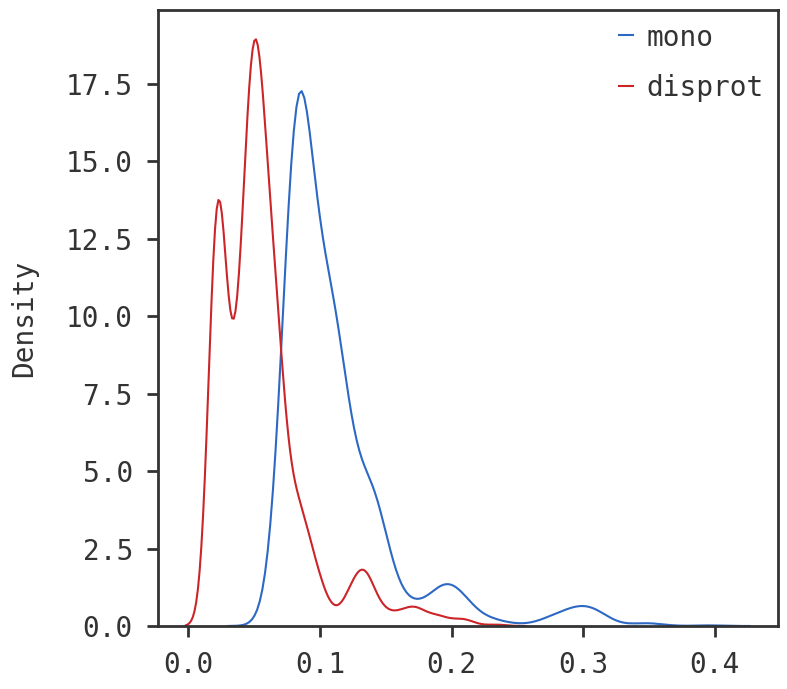

In [17]:
import seaborn as sns

plt.figure(dpi=100)
sns.kdeplot(mono_allloss, label="mono")
sns.kdeplot(disprot_allloss, label="disprot")
plt.legend()
plt.show()

In [15]:
mono_allfiveloss = list()
disprot_allfiveloss = list()
for protid in mono_fiveloss.keys():
    mono_allfiveloss += mono_fiveloss[protid]['5aa_loss']
    
for protid in disprot_fiveloss.keys():
    disprot_allfiveloss += disprot_fiveloss[protid]['5aa_loss']

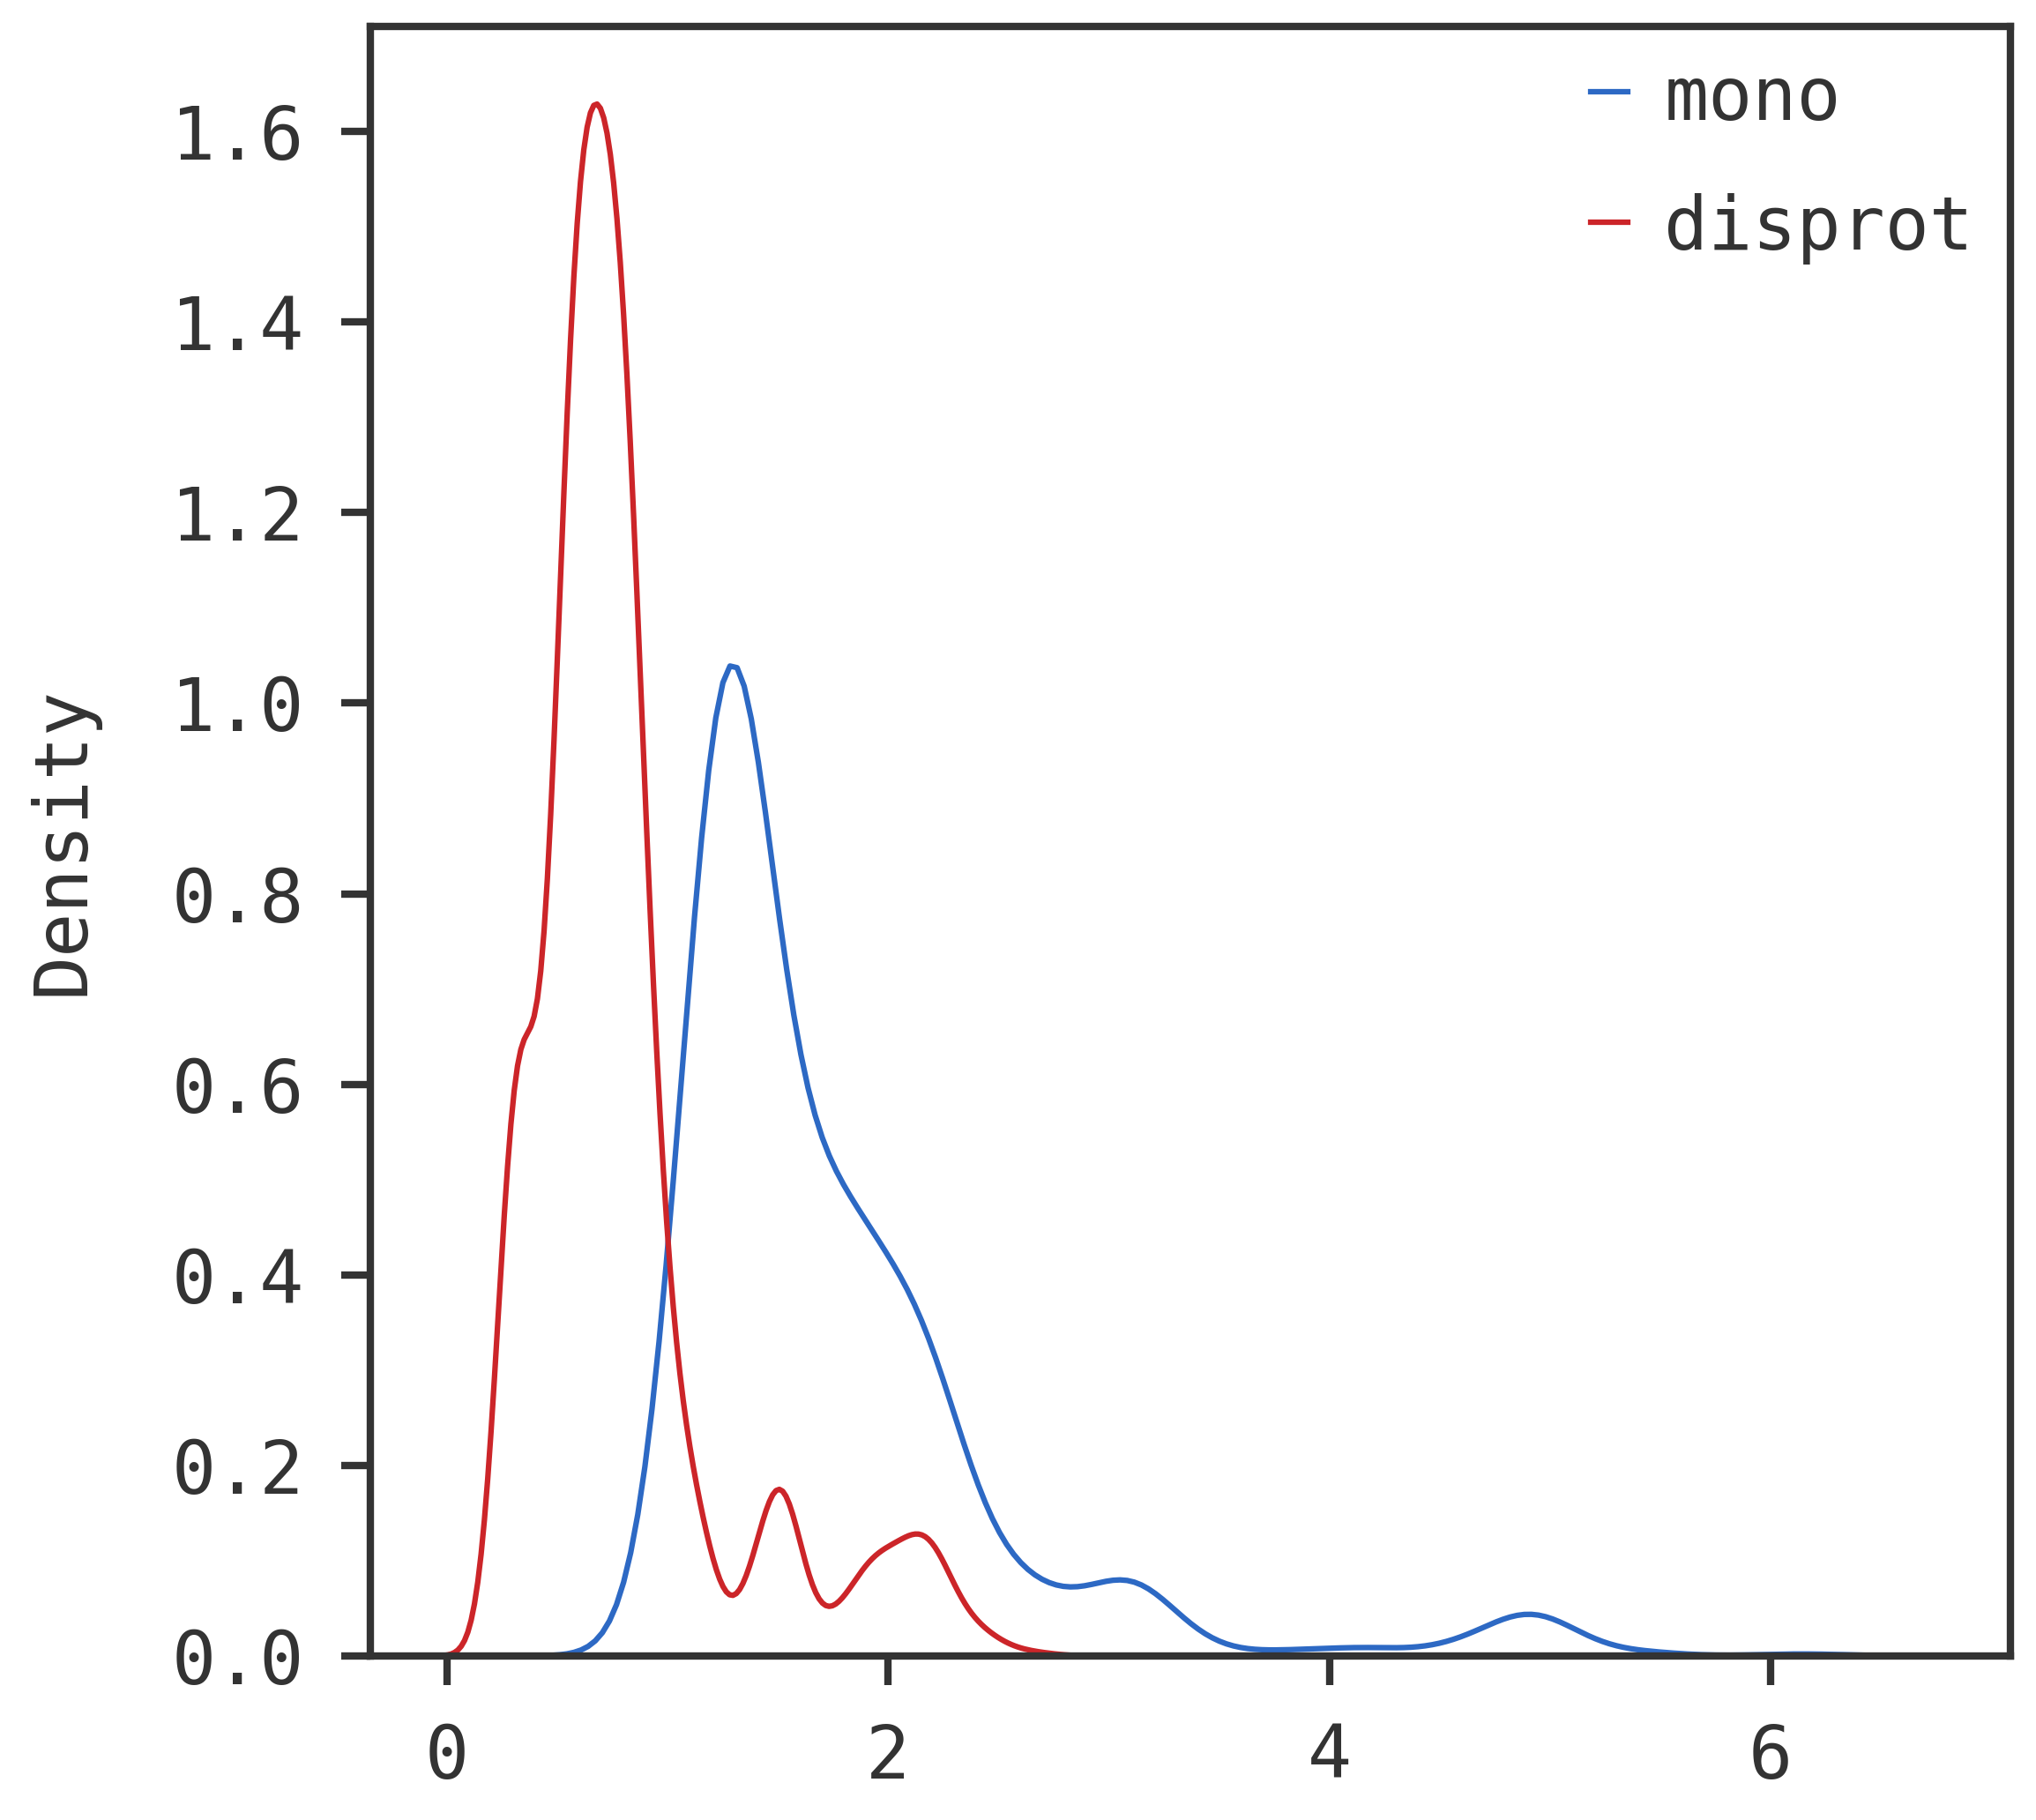

In [16]:

sns.kdeplot(mono_allfiveloss, label="mono")
sns.kdeplot(disprot_allfiveloss, label="disprot")
plt.legend()
plt.show()

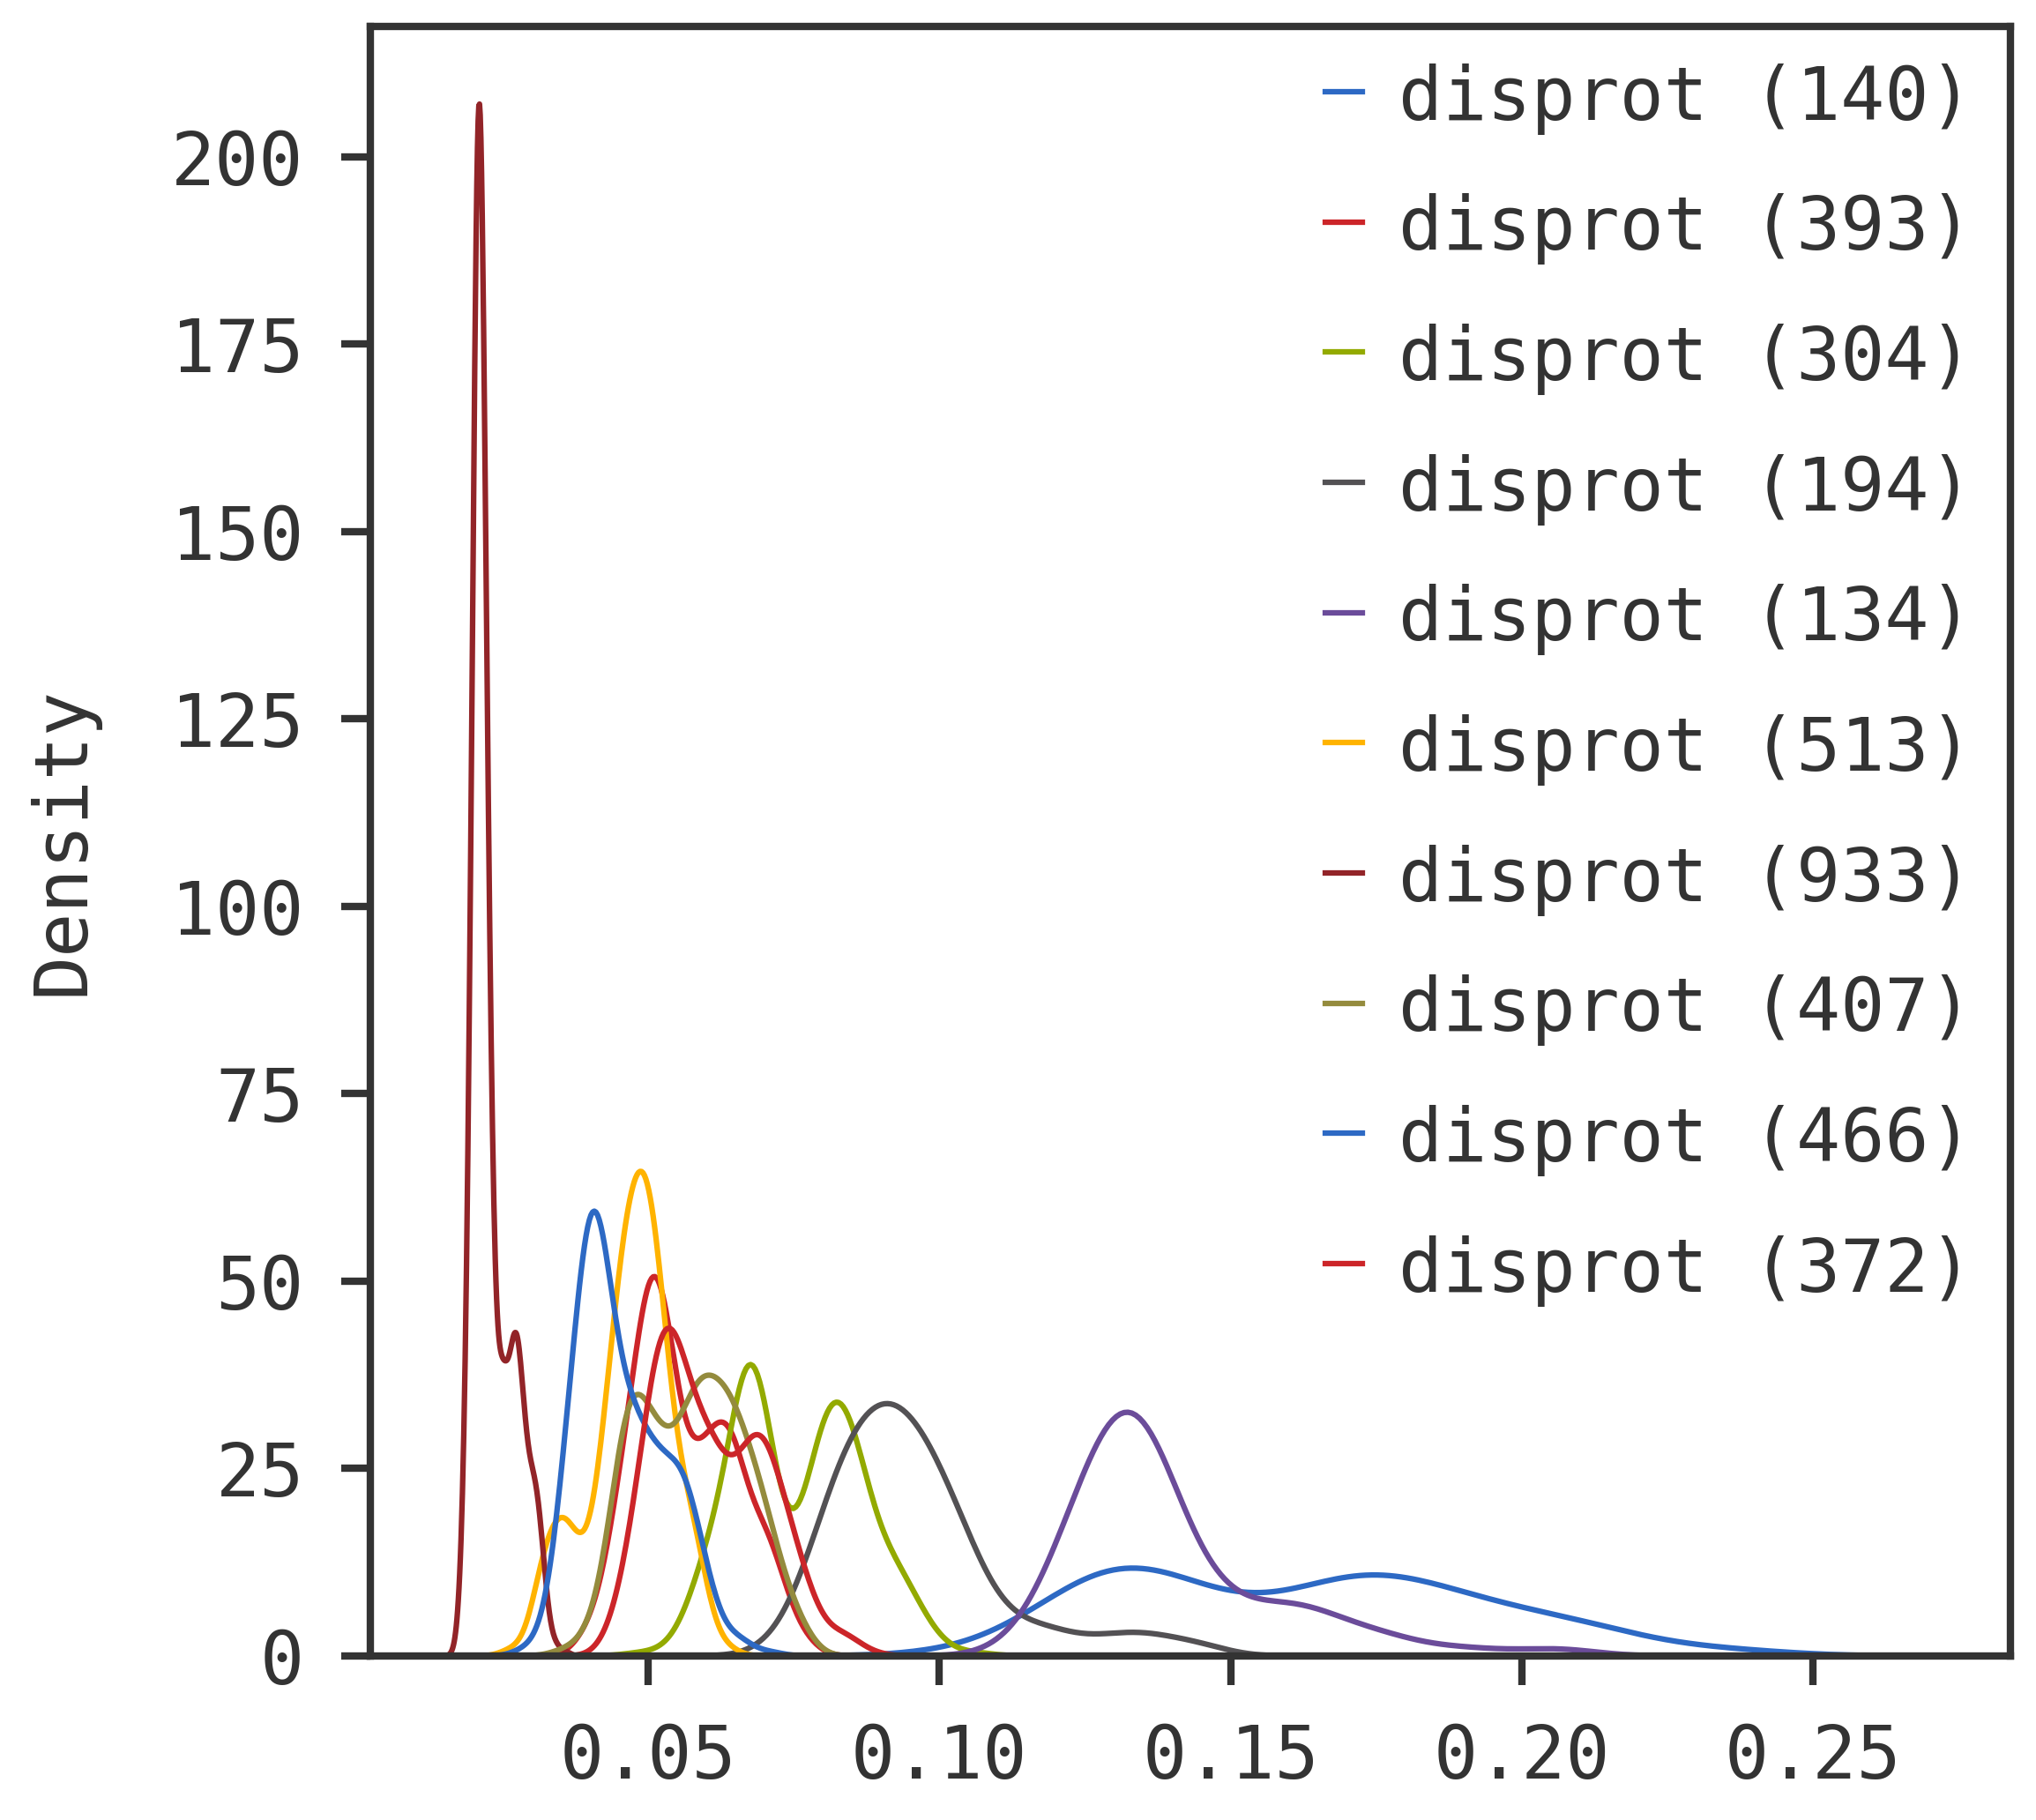

In [48]:
mono_allloss = list()
disprot_allloss = list()
# for protid in mono_singleloss.keys():
#     data = mono_singleloss[protid]['singleaa_loss']
#     sns.kdeplot(data, label=f"mono ({len(data)})")
    
for protid in disprot_singleloss.keys():
    data = np.array(disprot_singleloss[protid]['singleaa_loss'])
    #sns.kdeplot(data*len(data), label=f"disprot ({len(data)})")
    sns.kdeplot(data, label=f"disprot ({len(data)})")
    
plt.legend()
plt.show()

In [45]:
data[:100]

array([0.07104492, 0.06286621, 0.06051636, 0.08355713, 0.07391357,
       0.06750488, 0.05099487, 0.05465698, 0.06817627, 0.07269287,
       0.06896973, 0.07519531, 0.07086182, 0.06185913, 0.06677246,
       0.0715332 , 0.07147217, 0.06774902, 0.07037354, 0.0579834 ,
       0.07965088, 0.07696533, 0.07672119, 0.07196045, 0.0748291 ,
       0.07177734, 0.05245972, 0.04959106, 0.06634521, 0.0690918 ,
       0.04855347, 0.04943848, 0.0557251 , 0.0597229 , 0.04867554,
       0.05429077, 0.07141113, 0.0758667 , 0.05072021, 0.05227661,
       0.06884766, 0.06365967, 0.0579834 , 0.05224609, 0.05450439,
       0.04672241, 0.04797363, 0.04418945, 0.04724121, 0.05081177,
       0.05407715, 0.05358887, 0.05566406, 0.05258179, 0.05999756,
       0.06060791, 0.05093384, 0.05014038, 0.05450439, 0.0552063 ,
       0.05709839, 0.05227661, 0.05392456, 0.05517578, 0.05508423,
       0.05877686, 0.0597229 , 0.07275391, 0.05957031, 0.06170654,
       0.05657959, 0.05432129, 0.05441284, 0.05734253, 0.05859

In [49]:
## find loss per aa type
from collections import defaultdict

aa_dict = defaultdict(list)
for protid in disprot_singleloss.keys():
    print(protid)
    seq = disprot_dict[protid]['seq']
    data = np.array(disprot_singleloss[protid]['singleaa_loss'])
    for i in range(len(data)):
        aa_dict[seq[i]].append(data[i])
    break

P37840


/home/franco/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


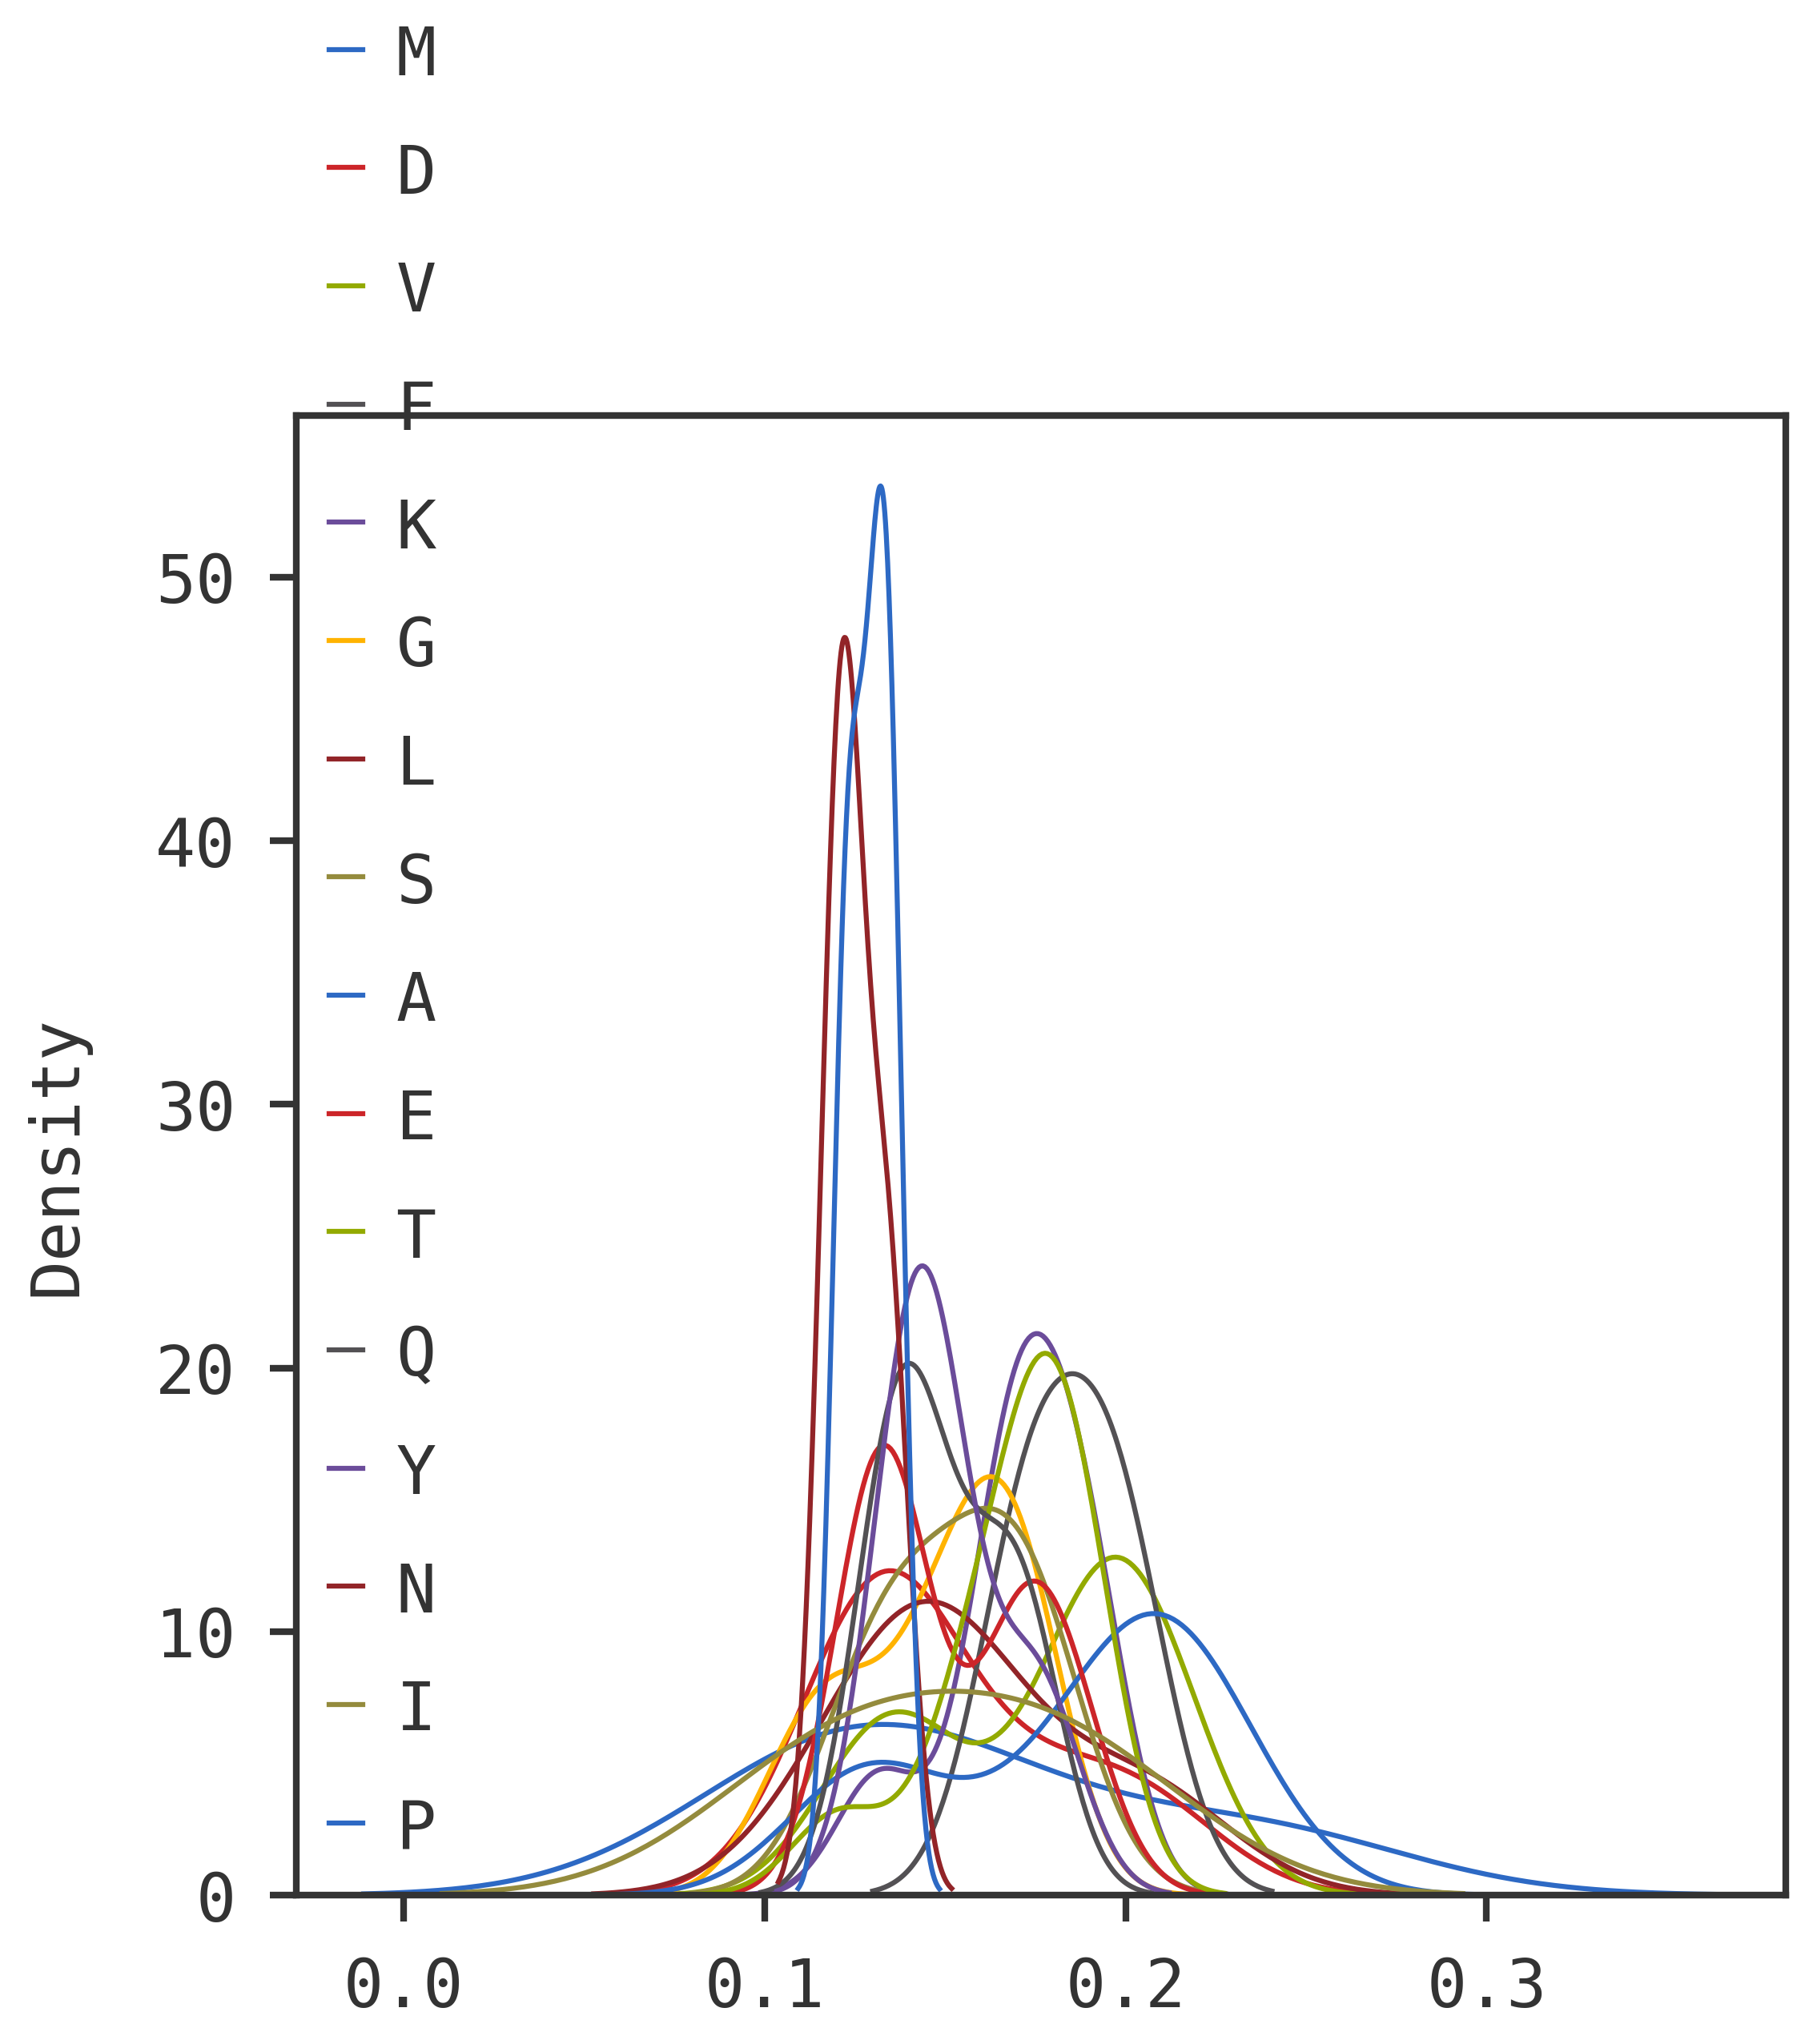

In [50]:
for AA in aa_dict.keys():
    data = np.array(aa_dict[AA])
    sns.kdeplot(data, label=f"{AA}")
    
plt.legend()
plt.show()

In [51]:
aa_dict

defaultdict(list,
            {'M': [0.2369384765625,
              0.159912109375,
              0.12091064453125,
              0.11602783203125],
             'D': [0.2064208984375,
              0.1767578125,
              0.1307373046875,
              0.134521484375,
              0.136962890625,
              0.129150390625],
             'V': [0.1385498046875,
              0.14599609375,
              0.1280517578125,
              0.2127685546875,
              0.18896484375,
              0.200927734375,
              0.2113037109375,
              0.140380859375,
              0.209228515625,
              0.1873779296875,
              0.19091796875,
              0.188232421875,
              0.1920166015625,
              0.166748046875,
              0.19775390625,
              0.2108154296875,
              0.1949462890625,
              0.1324462890625,
              0.12469482421875],
             'F': [0.197021484375, 0.1734619140625],
             'K': [0.19067382